In [1]:
###DATA CLEANING AND TIDYING###
from google.colab import files
import numpy as np
import pandas as pd

# To upload the dataset. ('dirty_young_people_drug_abuse.csv')
uploaded = files.upload()

data = pd.read_csv('dirty_young_people_drug_abuse.csv')

# Examine the dataset.
print(data.info())
print(data.head())
print(data.tail())
print(data.describe())

# Make variable names readable.
data.columns = ['year', 'age', 'gender', 'drugType', 'frequency', 'peerInfluence', 'familyHistory', 'mentalHealthIssue', 'schoolPerformance', 'economicStatus', 'region'\
                , 'accessToTreatment', 'parentalSupervision', 'criminalRecord', 'usageDurationYears', 'monthlyExpenseDrug', 'mentalHealthScore', 'hoursSocializingPerWeek'\
                , 'annualIncome', 'numberOfFriendsUsingDrugs']

# Strip unnecessary strings, signs, and standardize string formats.
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True).str.strip().str.lower()
    data[col] = data[col].str.replace('3', 'e', regex=False)
    data['annualIncome'] = data['annualIncome'].str.replace('e', '3', regex=False)

# Replace negative values in numberOfFriendsUsingDrugs column
data['numberOfFriendsUsingDrugs'] = data['numberOfFriendsUsingDrugs'].abs()

# Prepare annualIncome column for calculations
data['annualIncome'] = data['annualIncome'].fillna(0).astype(np.int64)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Replace 0 values with the mean excluding the 0 observations themselves (for annualIncome column)
for col in data.select_dtypes(include=['int64']).columns:
    mean_excluding_zeros = data.loc[data[col] != 0, col].mean()
    data[col] = data[col].replace(0, mean_excluding_zeros)

# Fill NaN values for numerical columns with the mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Fill NaN values for categorical columns with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Examine descriptive statistics and look for unusual behavior
print(data.describe()) # There is an unusual entry in numberOfFriendsUsingDrugs column

# Check for outliers and replace them with the mean
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    mean = data[col].mean()
    std = data[col].std()
    outliers = (data[col] < mean - 3 * std) | (data[col] > mean + 3 * std)
    data.loc[outliers, col] = mean

# Fix data types.
int_columns = ['year', 'age', 'usageDurationYears', 'mentalHealthScore', 'annualIncome', 'numberOfFriendsUsingDrugs']
for col in int_columns:
    data[col] = data[col].astype(np.int64)

# Final examination
print(data.info())
print(data.head())
print(data.tail())
print(data.describe())

# Uniformity checks (units, etc.)
# No unusual entries, thus no unit conversion is needed.

# Save the cleaned dataset
cleaned_file_path = 'cleaned_young_people_drug_abuse.csv'
data.to_csv(cleaned_file_path, index=False)

Saving dirty_young_people_drug_abuse.csv to dirty_young_people_drug_abuse.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             667 non-null    float64
 1   Age            679 non-null    float64
 2   gndr           677 non-null    object 
 3   DrugType       686 non-null    object 
 4   frqnc          680 non-null    object 
 5   peer_infl      672 non-null    object 
 6   familyHist     684 non-null    object 
 7   mntlHlth       683 non-null    object 
 8   SchoolPerf     667 non-null    object 
 9   econStat       686 non-null    object 
 10  Region         682 non-null    object 
 11  AccsToTrtmnt   687 non-null    object 
 12  ParentSuperv   695 non-null    object 
 13  CrimRec        677 non-null    object 
 14  UsageDurYr     683 non-null    float64
 15  MthExpDrug     681 non-null    float64
 16  MentalHlthSc   684 n

<ipython-input-1-1545e4d41c72>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


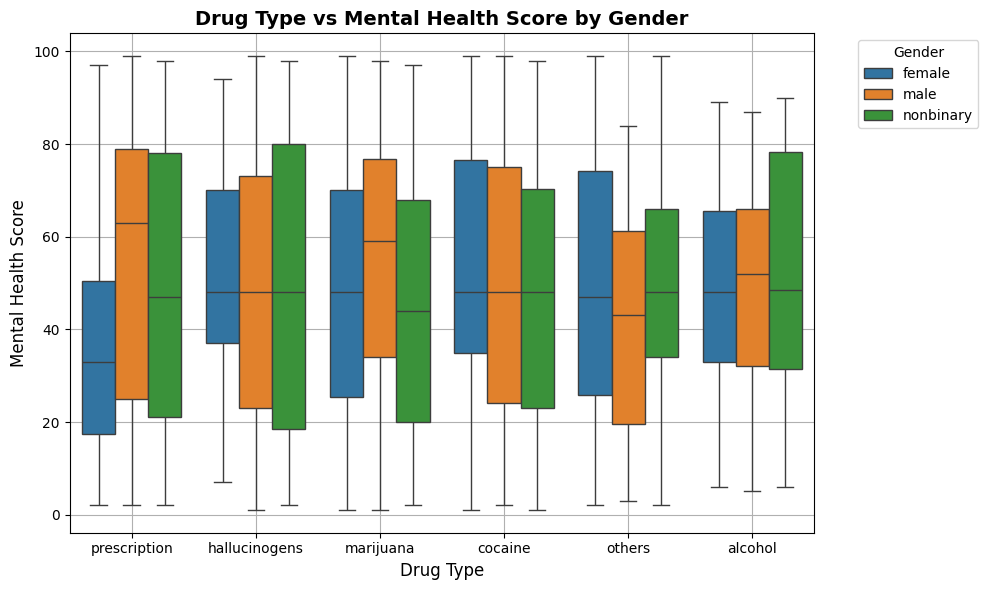

In [2]:
### Gökhan VAROL ###
# importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data set
df = pd.read_csv("cleaned_young_people_drug_abuse.csv")

# graph creation
plt.figure(figsize=(10, 6)) # sets the figure size to ensure the plot is clear and well-proportioned.
sns.boxplot( #  creates the box plot
    data=df, # specifies the dataset
    x="drugType", # maps drug types to the x-axis
    y="mentalHealthScore", # maps mental health scores to the y-axis
    hue="gender", # distinguishes gender categories (e.g., male, female, nonbinary) using different colors
    palette=sns.color_palette("tab10",n_colors=3) # applies a custom color scheme for better visualization
)
# graphics settings
plt.title("Drug Type vs Mental Health Score by Gender", fontsize=14, fontweight='bold') #Sets the title of the plot with bold formatting and a font size of 14
plt.xlabel("Drug Type", fontsize=12) #Labels the x-axis as "Drug Type" with a font size of 12
plt.ylabel("Mental Health Score", fontsize=12) #Labels the y-axis as "Mental Health Score" with a font size of 12
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')  # taking the legend off the charts
plt.grid(alpha=1) #Adds a grid to the plot

# Display
plt.tight_layout() # for an organized appearance
plt.show()


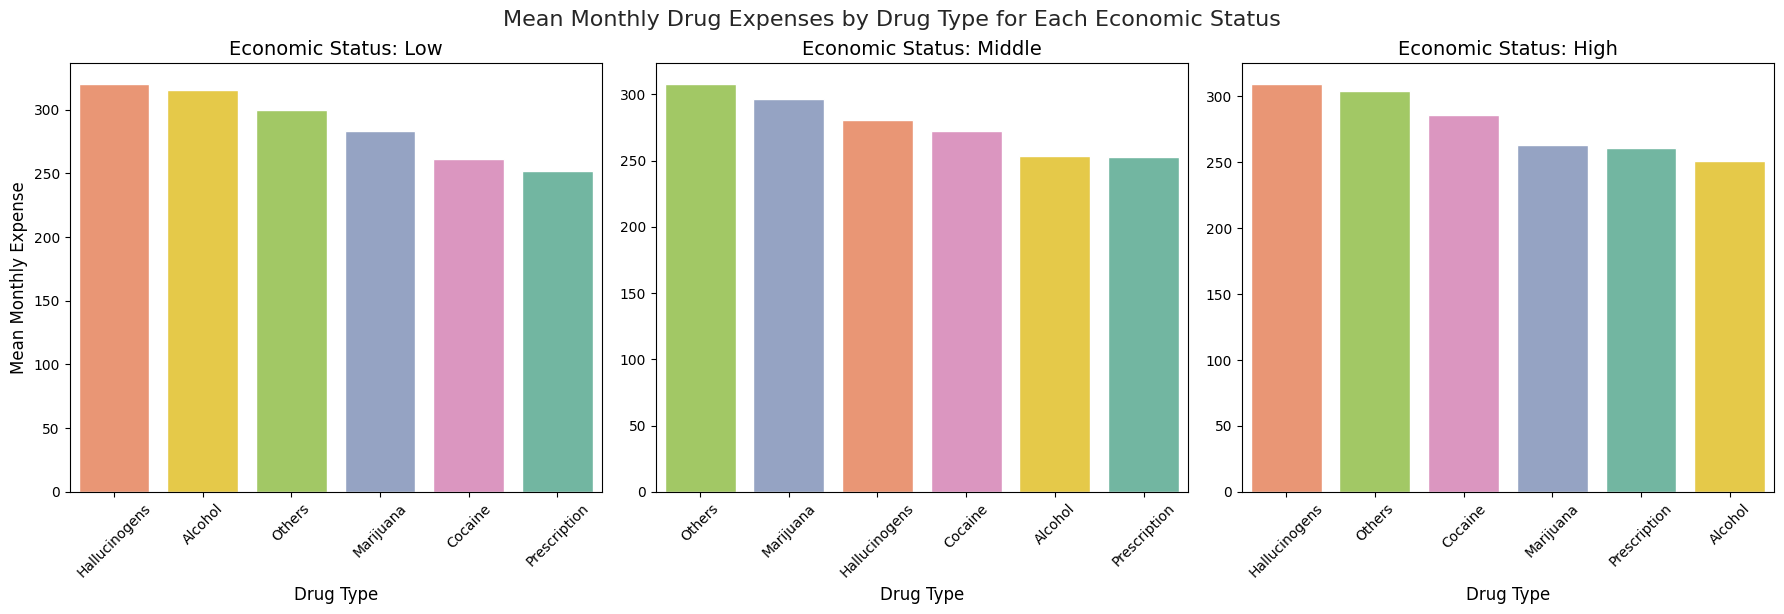

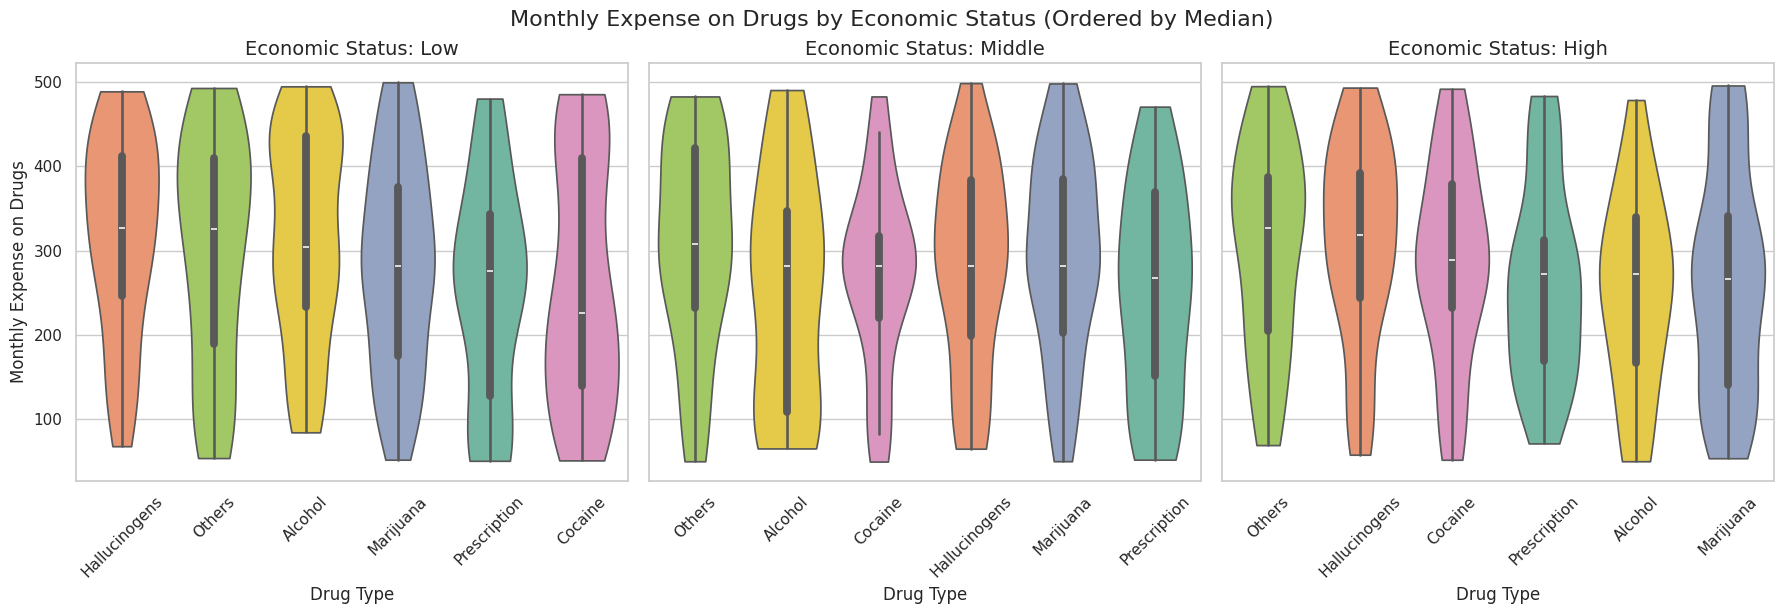

In [3]:
### Çağatay OKTAY ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded dataset.
file_path = 'cleaned_young_people_drug_abuse.csv'
data = pd.read_csv(file_path)

###VISUALIZATION 1: Mean Monthly Drug Expenses by Drug Type for Each Economic Status (in descending order)###

# Visual corrections.
data['economicStatus'] = data['economicStatus'].str.capitalize()
data['drugType'] = data['drugType'].str.capitalize()
economic_order = ["Low", "Middle", "High"]

# Calculate mean monthly expenses for each economicStatus and drugType.
mean_expenses = data.groupby(['economicStatus', 'drugType'])['monthlyExpenseDrug'].mean().reset_index()

# Create a custom order dictionary for each economic status.
custom_drug_orders = {}
for status in economic_order:
    custom_drug_orders[status] = (
        mean_expenses[mean_expenses['economicStatus'] == status]
        .sort_values(by='monthlyExpenseDrug', ascending=False)['drugType']
        .tolist()
    )

# Create a consistent color palette for drug types.
unique_drugs = data['drugType'].unique()
palette = sns.color_palette("Set2", len(unique_drugs))
color_mapping = dict(zip(unique_drugs, palette))

# Create a figure with subplots for each economic status.
fig, axes = plt.subplots(1, len(economic_order), figsize=(18, 6), sharey=False)
sns.set_theme(style="whitegrid")

# Loop through each economic status to create individual bar plots.
for ax, status in zip(axes, economic_order):
    # Filter data for the current economic status.
    group = mean_expenses[mean_expenses['economicStatus'] == status]

    # Get the custom order for the current economic status.
    sorted_order = custom_drug_orders[status]

    # Create a bar plot for the current economic status.
    sns.barplot(
        x="drugType",
        y="monthlyExpenseDrug",
        data=group,
        ax=ax,
        order=sorted_order,  # Use the custom order for this economic status.
        palette=color_mapping,  # Use consistent colors for drug types.
        hue="drugType", legend=False,
    )

    # Set title and labels for the subplot.
    ax.set_title(f"Economic Status: {status}", fontsize=14)
    ax.set_xlabel("Drug Type", fontsize=12)
    ax.set_ylabel("Mean Monthly Expense" if ax == axes[0] else "", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and add a main title.
plt.tight_layout()
fig.suptitle("Mean Monthly Drug Expenses by Drug Type for Each Economic Status", fontsize=16, y=1.02)

# Show the plot.
plt.show()

###VISUALIZATION 2: Monthly Expense on Drugs by Economic Status for Each Drug Type (Ordered by Medians)###

# Visual Corrections.
data['economicStatus'] = data['economicStatus'].str.capitalize()
data['drugType'] = data['drugType'].str.capitalize()
economic_order = ["Low", "Middle", "High"]

# Calculate medians for each economic status and drug type.
median_expense = data.groupby(['economicStatus', 'drugType'])['monthlyExpenseDrug'].median().reset_index()

# Create a dictionary to store custom orders for each economic status.
custom_drug_orders = {}
for status in economic_order:
    custom_drug_orders[status] = (
        median_expense[median_expense['economicStatus'] == status]
        .sort_values(by='monthlyExpenseDrug', ascending=False)['drugType']
        .tolist()
    )

# Define a consistent color palette for all drug types.
unique_drugs = data['drugType'].unique()
palette = sns.color_palette("Set2", len(unique_drugs))
color_mapping = dict(zip(unique_drugs, palette))

# Set up the plot.
fig, axes = plt.subplots(1, len(economic_order), figsize=(18, 6), sharey=True)
sns.set_theme(style="whitegrid")

# Plot each economic status with its custom drugType order.
for ax, status in zip(axes, economic_order):
    sns.violinplot(
        data=data[data['economicStatus'] == status],
        x="drugType",
        y="monthlyExpenseDrug",
        order=custom_drug_orders[status],
        ax=ax,
        palette=color_mapping,
        hue="drugType", legend=False,
        cut=0  # Prevents the violin from extending beyond the data range.
    )
    ax.set_title(f"Economic Status: {status}", fontsize=14)
    ax.set_xlabel("Drug Type", fontsize=12)
    ax.set_ylabel("Monthly Expense on Drugs" if ax == axes[0] else "", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and display the plot.
plt.tight_layout()
plt.suptitle("Monthly Expense on Drugs by Economic Status (Ordered by Median)", fontsize=16, y=1.02)
plt.show()


<Figure size 1400x800 with 0 Axes>

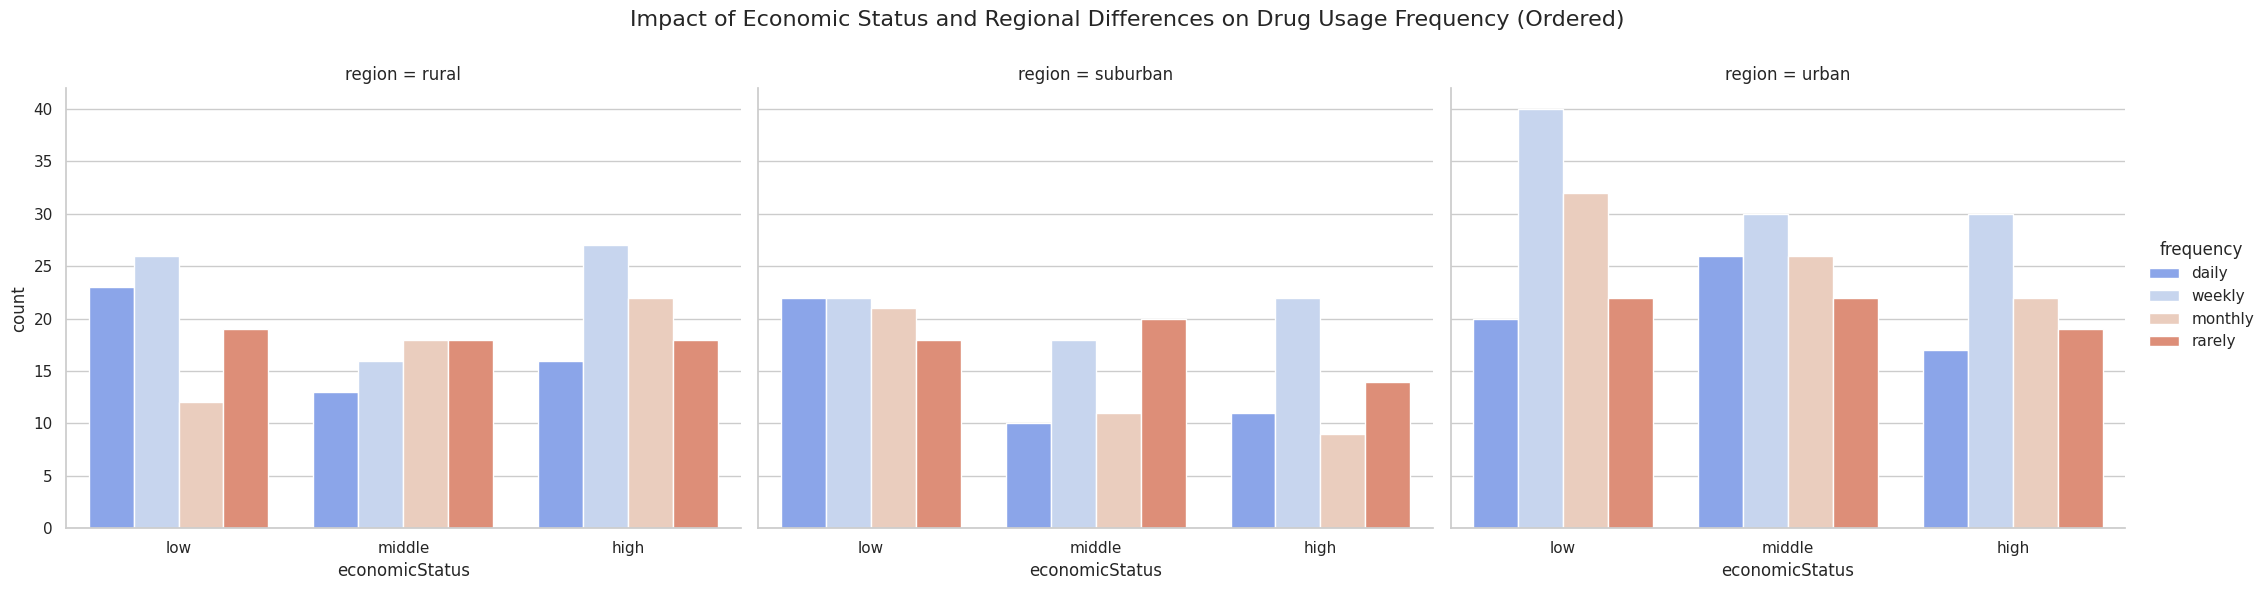

In [4]:
### Orçun Arda RENDA ###
#Upload necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Upload cleaned data set
data = pd.read_csv("cleaned_young_people_drug_abuse.csv")

#Choose the right column
economic_region_usage_counts = data[['economicStatus', 'region', 'frequency']].copy()

#Right grouped combination
economic_region_usage_counts = (
    economic_region_usage_counts.groupby(['economicStatus', 'region', 'frequency'])
    .size()
    .reset_index(name='count')
)

#Sort the economicStatus
economic_region_usage_counts['economicStatus'] = pd.Categorical(
    economic_region_usage_counts['economicStatus'],
    categories=['low', 'middle', 'high'],
    ordered=True
)

#Sort the region
economic_region_usage_counts['region'] = pd.Categorical(
    economic_region_usage_counts['region'],
    categories=['rural', 'suburban', 'urban'],
    ordered=True
)

#Sort the frequency
economic_region_usage_counts['frequency'] = pd.Categorical(
    economic_region_usage_counts['frequency'],
    categories=['daily', 'weekly', 'monthly', 'rarely'],
    ordered=True
)

#Create graph
plt.figure(figsize=(14, 8))
sns.catplot(
    data=economic_region_usage_counts,
    x='economicStatus',
    y='count',
    hue='frequency',
    col='region',
    kind='bar',
    errorbar=None,
    palette='coolwarm',
    height=6,
    aspect=1.2
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Impact of Economic Status and Regional Differences on Drug Usage Frequency (Ordered)', fontsize=16)

#Save graph
plt.savefig("economic_region_usage_frequency_ordered.png")

#Show graph
plt.show()

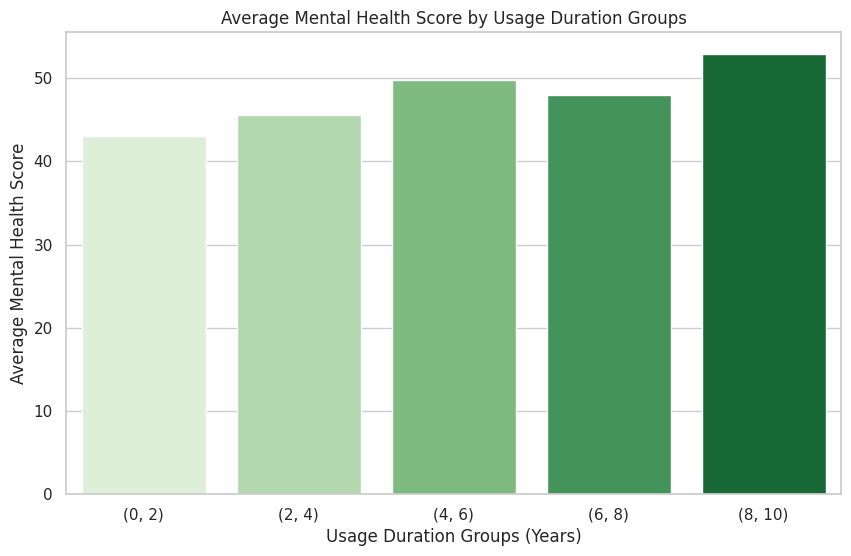

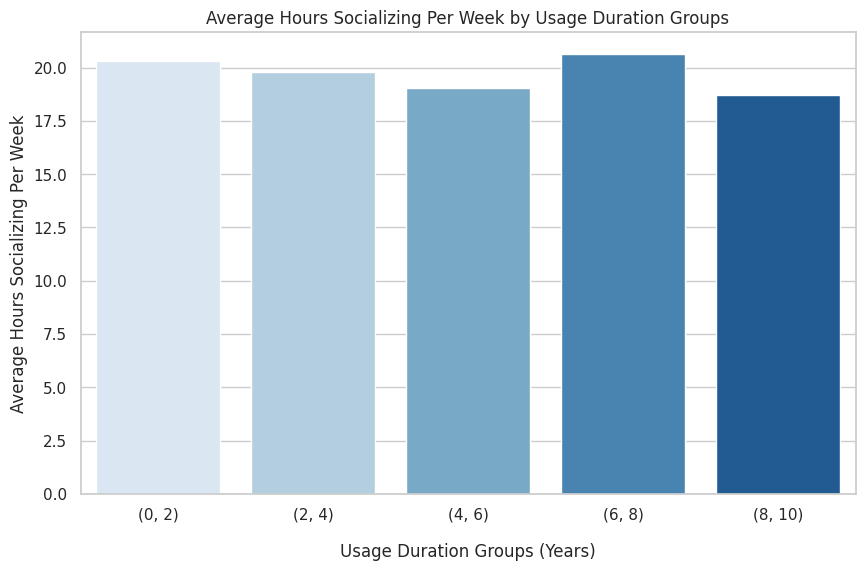

In [5]:
### Adil Emre KALKAN ###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the dataset
data = pd.read_csv('cleaned_young_people_drug_abuse.csv')

# Create classes for usageDurationYears
bins = [0, 2, 4, 6, 8, 10]
labels = ['(0, 2)', '(2, 4)', '(4, 6)', '(6, 8)', '(8, 10)']
data['usageDurationGroup'] = pd.cut(data['usageDurationYears'], bins=bins, labels=labels, right=False)

# Calculate mean mentalHealthScore for each class
avg_mental_health = data.groupby('usageDurationGroup',observed=False)['mentalHealthScore'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='usageDurationGroup', y='mentalHealthScore', data=avg_mental_health, palette='Greens',hue="usageDurationGroup")

# Add plot title and axis labels
plt.title('Average Mental Health Score by Usage Duration Groups')
plt.xlabel('Usage Duration Groups (Years)')
plt.ylabel('Average Mental Health Score')

# Calculate mean socializing hours for each class
avg_socializing_hours = data.groupby('usageDurationGroup',observed=False)['hoursSocializingPerWeek'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='usageDurationGroup', y='hoursSocializingPerWeek', data=avg_socializing_hours, palette='Blues',hue="usageDurationGroup")

# Add plot title and axis labels
plt.title('Average Hours Socializing Per Week by Usage Duration Groups')
plt.xlabel('Usage Duration Groups (Years)', labelpad=15)
plt.ylabel('Average Hours Socializing Per Week')

# Show plot
plt.show()

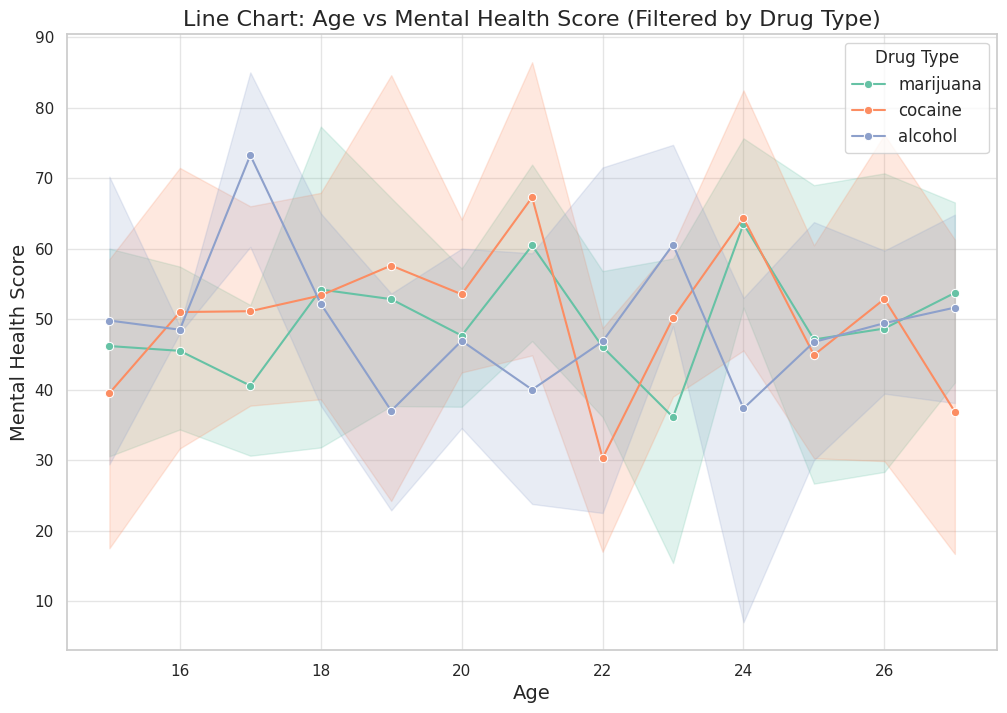

In [7]:
### Ömer KOLCU ###
# importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data set
data = pd.read_csv("cleaned_young_people_drug_abuse.csv")
#This code filters the dataset to include only rows where the `drugType` column contains one of the values: "marijuana," "cocaine," or "alcohol."
filtered_data = data[data['drugType'].isin(['marijuana', 'cocaine', 'alcohol'])]

# Creating a line chart with the filtered data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=filtered_data,
    x="age",
    y="mentalHealthScore",
    hue="drugType",
    palette='Set2',
    marker='o'
)

# graphics settings
plt.title('Line Chart: Age vs Mental Health Score (Filtered by Drug Type)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Mental Health Score', fontsize=14)
plt.legend(title='Drug Type', fontsize=12, loc='upper right')
plt.grid(alpha=0.5)
plt.show()

     year  age     gender       drugType frequency peerInfluence  \
0    2011   18     female   prescription    weekly          high   
1    2019   18       male  hallucinogens   monthly        medium   
2    2010   17     female  hallucinogens     daily          high   
3    2023   24     female      marijuana     daily          high   
4    2004   18     female        cocaine    weekly        medium   
..    ...  ...        ...            ...       ...           ...   
727  2022   20     female  hallucinogens    weekly        medium   
728  2004   19       male         others    weekly        medium   
729  2017   25  nonbinary        alcohol    weekly        medium   
730  2011   20  nonbinary   prescription    weekly        medium   
731  2004   15     female      marijuana    weekly        medium   

    familyHistory mentalHealthIssue schoolPerformance economicStatus  \
0              no               yes              poor            low   
1             yes               yes    

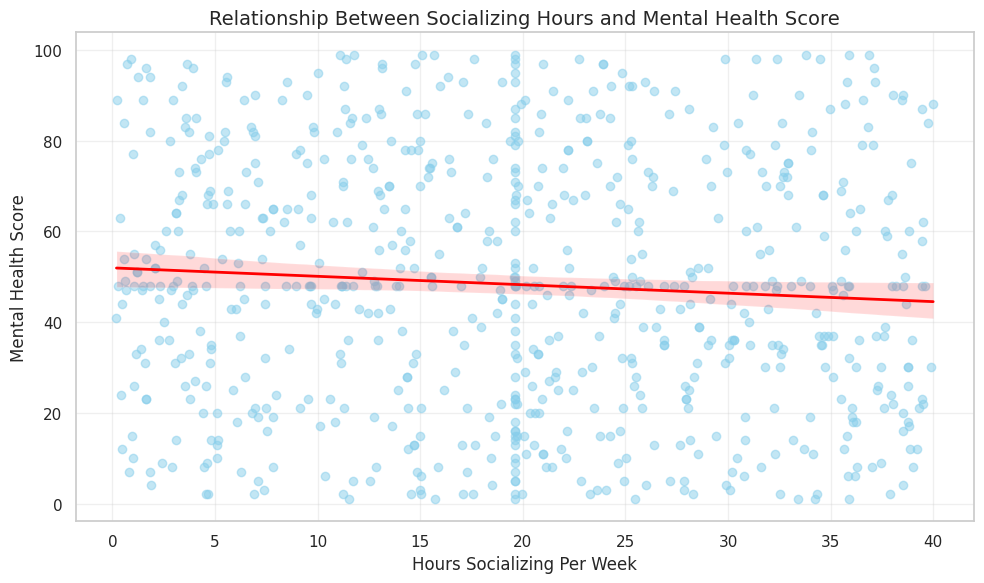

In [8]:
### Ata KAVAK ###
#importing necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("cleaned_young_people_drug_abuse.csv")
print(df)

plt.figure(figsize=(10, 6)) #this line is for arrange the size to make the plot visually clear and wide

sns.regplot( # this line is for creating a scatter plot with a regression line
    data=df,  # data set which was used for graph
    x='hoursSocializingPerWeek',  # axis x variable (socializing hours)
    y='mentalHealthScore',  # axis y variable (mental health score)
    scatter_kws={
        'alpha': 0.5,  # this line is for arrange the visibility of circles in the plot
        'color': 'skyblue'  # color adjustment
    },
    line_kws={
        'color': 'red',  # color adjustment of regression line
        'linewidth': 2 })# thickness adjustment of regression line



plt.title('Relationship Between Socializing Hours and Mental Health Score', fontsize=14)# tittle for the plot
plt.xlabel('Hours Socializing Per Week', fontsize=12)# naming the axis x to show what it represents
plt.ylabel('Mental Health Score', fontsize=12)# naming the axis y to show what it represents
plt.grid(alpha=0.3)  # using a grid for better visualize the graphic and adjust its thickness

plt.tight_layout()# this is for a better visualization
plt.show() #this is for display the code